<a href="https://www.kaggle.com/code/bcscuwe1/titanic-classification?scriptVersionId=196878154" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# The Problem
Develop an algorithm to predict the survival outcome of passengers on the Titanic

-------------------------------

**Project Summary**: The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, England, to New York City, United States. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it the deadliest sinking of a single ship up to that time. It remains the deadliest peacetime sinking of an ocean liner or cruise ship.

Titanic had advanced safety features, such as watertight compartments and remotely activated watertight doors, contributing to its reputation as "unsinkable". The ocean liner carried some of the wealthiest people in the world, as well as hundreds of emigrants from Great Britain and Ireland, Scandinavia, and elsewhere throughout Europe, who were seeking a new life in the United States and Canada.

Titanic was equipped with 16 lifeboat davits, each capable of lowering three lifeboats, for a total of 48 boats; she carried only 20 lifeboats, four of which were collapsible and proved hard to launch while she was sinking (Collapsible A nearly swamped and was filled with a foot of water until rescue, Collapsible B completely overturned while launching). Together, the 20 lifeboats could hold 1,178 people—about half the number of passengers on board, and one third of the number of passengers the ship could have carried at full capacity (consistent with the maritime safety regulations of the era). When the ship sank, many of the lifeboats that had been lowered were only about half full.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

**In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.**

In [123]:
import numpy as np  # linear algebra
import pandas as pd # train processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline 
# magic command that allows the plots to be displayed directly in the Jupyter Notebook.
import seaborn as sns # train visualization library based on matplotlib that provides a high-level interface for creating attractive and informative statistical graphics
import sklearn # A machine learning library in Python that provides a range of tools for train analysis, modeling, and evaluation.

pd.set_option('display.max_columns',500) 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [124]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.svm import SVC
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# Read train

In [125]:
train = pd.read_csv('/kaggle/input/titanic/train.csv',)
test = pd.read_csv('/kaggle/input/titanic/test.csv')
sub = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [126]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [128]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# UnderStanding train

*    PassengerId is the unique id of the row and it doesn't have any effect on target
*    Survived is the target variable we are trying to predict (0 or 1):
    * 1 = Survived
    * 0 = Not Survived
* Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
    * 1 = Upper Class
    * 2 = Middle Class
    * 3 = Lower Class
* Name, Sex and Age are self-explanatory
* SibSp is the total number of the passengers' siblings and spouse
* Parch is the total number of the passengers' parents and children
* Ticket is the ticket number of the passenger
* Fare is the passenger fare
* Cabin is the cabin number of the passenger
* Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
    * C = Cherbourg
    * Q = Queenstown
    * S = Southampton

Which features are available in the trainset?

**Which features are categorical?**

   * Categorical: **Survived, Sex, and Embarked**.
   * Ordinal: **Pclass**.
    
**What is the distribution of categorical features?**

* Names are unique across the trainset (count=unique=891)
* Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
* Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
* Embarked takes three possible values. S port used by most passengers (top=S)
* Ticket feature has high ratio (22%) of duplicate values (unique=681).

**Which features are numerical?**

   * Continous: **Age, Fare.**
   * Discrete: **SibSp, Parch.**
    
**What is the distribution of numerical feature values across the samples?**

This helps us determine, among other early insights, how representative is the training trainset of the actual problem domain.

* Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).
* Survived is a categorical feature with 0 or 1 values.
* Around 38% samples survived representative of the actual survival rate at 32%.
* Most passengers (> 75%) did not travel with parents or children.
* Nearly 30% of the passengers had siblings and/or spouse aboard.
* Fares varied significantly with few passengers (<1%) paying as high as $512.
* Few elderly passengers (<1%) within age range 65-80.

**Which features are mixed train types?**

Numerical, alphanumeric train within same feature. These are candidates for correcting goal.

* Ticket is a mix of numeric and alphanumeric train types. Cabin is alphanumeric.

**Which features may contain errors or typos?**

This is harder to review for a large trainset, however reviewing a few samples from a smaller trainset may just tell us outright, which features may require correcting.

* Name feature may contain errors or typos as there are several ways used to describe a name including titles, round brackets, and quotes used for alternative or short names.

In [129]:
train.info(),print('\n'), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass

(None, None, None)

In [130]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let See Unique Values and their count

In [131]:
value_df = train.copy(deep=True)
for col in value_df.columns:
    value_df[col] = value_df[col].astype('str')
    print(f"There are {value_df[col].nunique()} Unique valuse in Column '{col}'.")
    if train[col].nunique() < 150:
        print(f"\nUnique values in '{col}' column: {sorted(value_df[col].unique().tolist())}")
        df = pd.DataFrame(value_df[col].value_counts().values, columns=['Value'], index=value_df[col].value_counts().index)
        df['Percentage'] = value_df[col].value_counts(normalize=True)*100
        print(df)
    print()
    print("--"*50)

There are 891 Unique valuse in Column 'PassengerId'.

----------------------------------------------------------------------------------------------------
There are 2 Unique valuse in Column 'Survived'.

Unique values in 'Survived' column: ['0', '1']
   Value  Percentage
0    549   61.616162
1    342   38.383838

----------------------------------------------------------------------------------------------------
There are 3 Unique valuse in Column 'Pclass'.

Unique values in 'Pclass' column: ['1', '2', '3']
   Value  Percentage
3    491   55.106622
1    216   24.242424
2    184   20.650954

----------------------------------------------------------------------------------------------------
There are 891 Unique valuse in Column 'Name'.

----------------------------------------------------------------------------------------------------
There are 2 Unique valuse in Column 'Sex'.

Unique values in 'Sex' column: ['female', 'male']
        Value  Percentage
male      577   64.758698
female 

4. Convert gender to 0 and 1 - Transform the 'sex' column to binary values (0 for male, 1 for female) for easier analysis.
6. Analyze the 'Ticket' column - Given that 71% of values are distinct, it may be best to drop this column due to limited information.
7. Address outliers in 'Fare' - Identify and address outliers in the 'Fare' column, potentially by creating bins for fare ranges.
8. Handle missing values in 'Cabin' - Since 'Cabin' has many missing values, consider dropping this column to avoid incomplete train. create feature cabin level to determine level compartment of ship's resident.
9. Utilize 'Embarked' for status - Leverage the 'Embarked' column to gain insights related to passenger status or origin. (best to drop it, since status can be achive from pclass and origin has no use.
10. some train imbalance in features [Parch, sibsp, Pclass, Sex, Survived]
11. apply encording
12. fix distribution(use robust scaling).
13. add coloumn [0,1] for filling in missing train.
These steps aim to clean and optimize the trainset for more meaningful analysis.

# Feature Engineering

for outliers Max Values in Age and Fare are too far from values in 75% quatite, we should address these values as outliers. For 'Age', I will use robust scaling and bins. For 'Fare', based on Distribution replace high values with upper bound as well as apply bins

there missing value in both train and test, i will check if they are random at random or not, then apply conditions based impution on personal expetise.

New features

* **Title**: I will extract title from Name column and apply encoding.

* **Last Name**: Family Name could be helpful.

* **Family Size** can be calculate by summing the member of family acompanying them(+1 is for person itself):

    1. sibsp: The trainset defines family relations in this way...

        * Sibling = brother, sister, stepbrother, stepsister.

        * Spouse = husband, wife (mistresses and fiancés were ignored).

    2. parch: The trainset defines family relations in this way...
        * Parent = mother, father

        * Child = daughter, son, stepdaughter, stepson.

        * Some children travelled only with a nanny, therefore parch=0 for them.
     
* **isAlone**: If Family Size is 1 then person was travelling Alone. I investigate Alone person colrelation Survived


* **Fare Bin**: Quantile-based discretization function.

* **Age Bin**: values into discrete intervals.


        Continuous variable bins; qcut vs cut: https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut
        
        
* **Cabin Level**: First Letter of Cabin to advocate for priority.


## Outliers

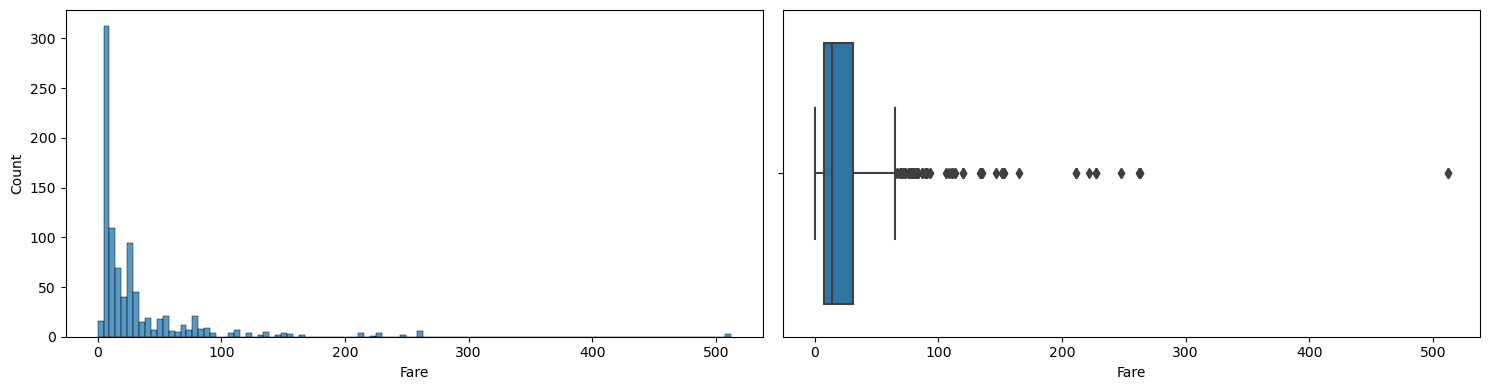

In [132]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))  # Adjusted figsize to match the subplot layout

# Histogram
sns.histplot(data=train, x='Fare', ax=ax[0])
# Boxplot
sns.boxplot(data=train, x='Fare', ax=ax[1])

plt.tight_layout()  # To prevent overlapping of plots
plt.show()

The distribution is right-skewed with non-extreme outliers. To handle these outliers, I replaced them with an upper bound calculated as the 75th percentile (Q3) plus 1.5 times the interquartile range (IQR). Since fare values cannot be negative, there is no need to set a lower bound.

In [133]:
col = train['Fare'].copy(deep=True)
quan_75 = col.quantile(.75)  #31.0
quan_25 = col.quantile(.25)  #7.9104
IQR = quan_75 - quan_25         #23.0896
upper_bound = quan_75 + IQR * 1.5
train['Fare'] = col.mask(col>upper_bound, upper_bound)

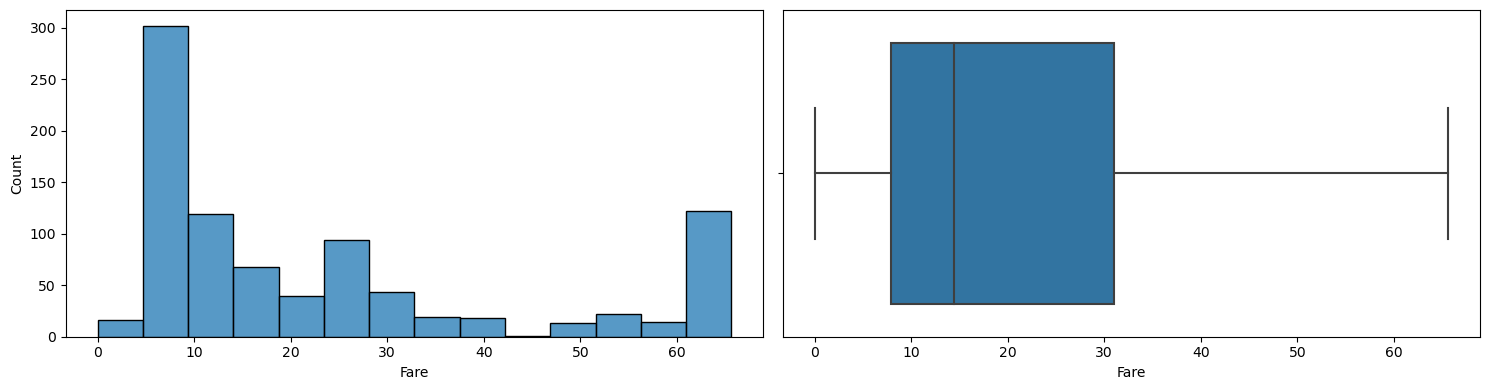

In [134]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))  # Adjusted figsize to match the subplot layout

# Histogram
sns.histplot(data=train, x='Fare', ax=ax[0])
# Boxplot
sns.boxplot(data=train, x='Fare', ax=ax[1])

plt.tight_layout()  # To prevent overlapping of plots
plt.show()

Must better, transformation is require for normal distribution

Now lets see which column has missing values.

In [135]:
print('   Train Dataset\n{}'.format(train.isnull().sum()))
print('\n   Test Dataset\n{}'.format(test.isnull().sum()))

   Train Dataset
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

   Test Dataset
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


To check if 'Cabin' and 'Age' missing values are Missing Completely at Random (MCAR), Missing At Random (MAR), Missing Not at Random (MNAR)

In [136]:
import statsmodels.api as sm

# Copy DataFrame
df = train.copy(deep=True)
# Create a binary indicator for missing values in a specific column
df['missing_indicator'] = np.where(df['Cabin'].isnull(), 1, 0)
df['Sex_indicator'] = np.where(df['Sex']=='female', 1, 0)

# Add constant for logistic regression
df['intercept'] = 1

# Logistic regression
logit_model = sm.Logit(df['missing_indicator'], df[['intercept', 'Fare', 'Pclass', 'Sex_indicator']])
result = logit_model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.244379
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:      missing_indicator   No. Observations:                  891
Model:                          Logit   Df Residuals:                      887
Method:                           MLE   Df Model:                            3
Date:                Mon, 16 Sep 2024   Pseudo R-squ.:                  0.5458
Time:                        11:51:27   Log-Likelihood:                -217.74
converged:                       True   LL-Null:                       -479.37
Covariance Type:            nonrobust   LLR p-value:                4.355e-113
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -2.9212      0.568     -5.145      0.000      -4.034      -1.808
Fare             -0.0162      0.007     -2.165      0.030      -0.031      -0.002
Pclass            2.5854      0.242     10.691      0.000       2.111       3.059
Sex_indicator    -0.4540      0.264     -1.723      0.085      -0.971       0.063
=================================================================================
"""

Interpretation:

* Coefficient: The intercept term is -2.6618. In a logistic regression model, the intercept represents the log-odds of the outcome when all predictors are at their reference values (e.g., zero).
* Statistical Significance: The p-value is very small (0.000), indicating that the intercept is statistically significant.
* Confidence Interval: The 95% confidence interval for the intercept does not include zero, further confirming its statistical significance.

more tests require chi2

I assume age is not missing completely at random, so capturing nan values with new features

In [137]:
columns_missing = ["Age"]
for col in columns_missing:
    train[col+'_nan'] = train[col].apply(lambda x: 1 if pd.isna(x) else 0)

performing feature engineering

In [138]:
train['Title'] = train['Name'].str.split(", ",expand=True)[1].str.split(". ",expand=True)[0]
train['Last Name'] = train['Name'].str.split(",", expand=True)[0]
train['Family Size'] = train['SibSp'] + train['Parch'] + 1
train['isAlone'] = train['Family Size'].apply(lambda x: 1 if x == 1 else 0)
train['Cabin'].fillna("Missing", inplace=True)
train['Cabin Level'] = train['Cabin'].astype('str').str[0]

## Imputation

'Embarked': The column have two missing values with fare 80, pclass 1, cabin B28, same Ticket number. My conclusion these values are not arbitrary.


### Emabarked: Port of Embarkation

C = Cherbourg, Q = Queenstown, S = Southampton

In [139]:
train[train['Embarked'].isnull() == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_nan,Title,Last Name,Family Size,isAlone,Cabin Level
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,65.6344,B28,NaN,0,Miss,Icard,1,1,B
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,65.6344,B28,NaN,0,Mrs,Stone,1,1,B


The two missing values have fare 80, pclass 1, cabin B28, same Ticket number **(maybe data is mismatch)**. My conclusion these values are not arbitrary.

From countplot we see Embarked C is common around for Pclass 1 above Fare 60 and gender Female.

Since "Embarked" is a categorical variable, I will use the mode (most frequent value) with conditions, conditions are choosen based on personal expertise.

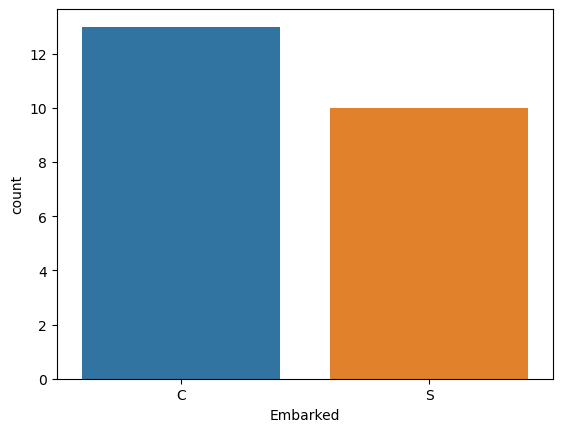

In [140]:
embark = train.loc[(train['Pclass']==1) & (train['Fare']>60) & (train['Sex']=='female') & (train['isAlone']==1)]
sns.countplot(embark, x='Embarked');

In [141]:
train['Embarked'].fillna(embark['Embarked'].mode()[0], inplace=True)

### Fare: Passenger fare

We will use train dataset with conditions to fillna in test to avoid overfitting.

In [142]:
test[test['Fare'].isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [143]:
train[['Embarked', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch']].corrwith(train['Fare'], numeric_only=True)

Pclass   -0.715300
Age       0.151920
SibSp     0.332021
Parch     0.292616
dtype: float64

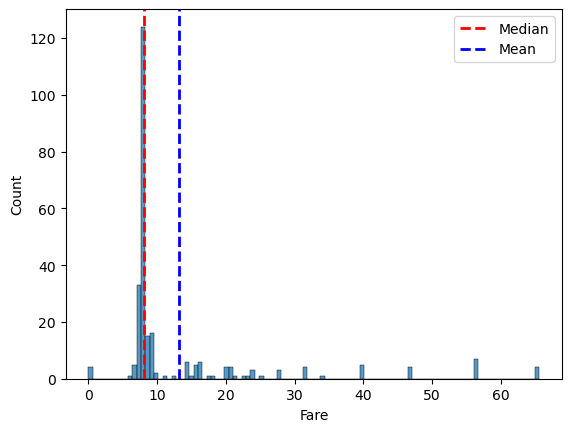

In [144]:
fare = train[(train['Pclass']==3) & (train['Sex']=='male') & (train['Embarked']=='S') ]
sns.histplot(fare['Fare'])
plt.axvline(fare['Fare'].median(), color='red', linestyle='dashed', linewidth=2, label='Median')
plt.axvline(fare['Fare'].mean(), color='blue', linestyle='dashed', linewidth=2, label='Mean')
plt.legend()
plt.show()

Correlation helps in deciding which conditions to apply when handling missing values. Since the feature shows a 'right-skewed' distribution, using the `median` is more appropriate for filling `NaN` values, as it is less sensitive to outliers than the `mean`.

In [145]:
test['Fare'].fillna(fare['Fare'].median(), inplace=True)

### Age

263 rows have null value in age column. we seprate the child one from adult using title in name. 

Utilized **mask()** to fill values with condition.

In Miss,Mrs,Mr, Case: we will class condition to get the mean.

In Master Case: we have missing values only in 3rd class, From jointplot we can see Fare, Age, and Embarked have minimum impact.

In [146]:
train.loc[train['Age'].isnull(), 'Title'].value_counts()

Mr        119
Miss       36
Mrs        17
Master      4
Dr          1
Name: Title, dtype: int64

### Miss Case

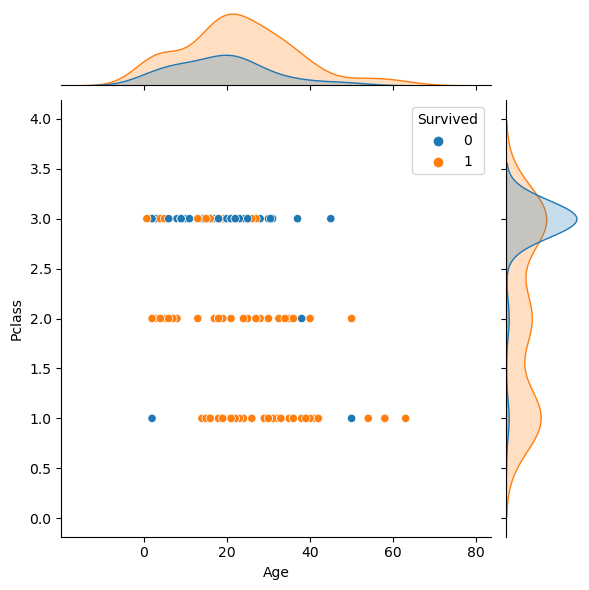

In [147]:
miss_df = train.loc[(train['Title']=='Miss')]
sns.jointplot(miss_df, x='Age', y='Pclass', hue='Survived')

mr1_age = train.loc[(train['Title'] == 'Miss') & (train['Pclass'] == 1), 'Age'].mean()
mr2_age = train.loc[(train['Title'] == 'Miss') & (train['Pclass'] == 2), 'Age'].mean()
mr3_age = train.loc[(train['Title'] == 'Miss') & (train['Pclass'] == 3), 'Age'].mean()

# Filling Values
train['Age'] = train['Age'].mask((train['Title'] == 'Miss') & (train['Pclass'] == 1) & train['Age'].isnull(), mr1_age)
train['Age'] = train['Age'].mask((train['Title'] == 'Miss') & (train['Pclass'] == 2) & train['Age'].isnull(), mr2_age)
train['Age'] = train['Age'].mask((train['Title'] == 'Miss') & (train['Pclass'] == 3) & train['Age'].isnull(), mr3_age)

### Mrs Case

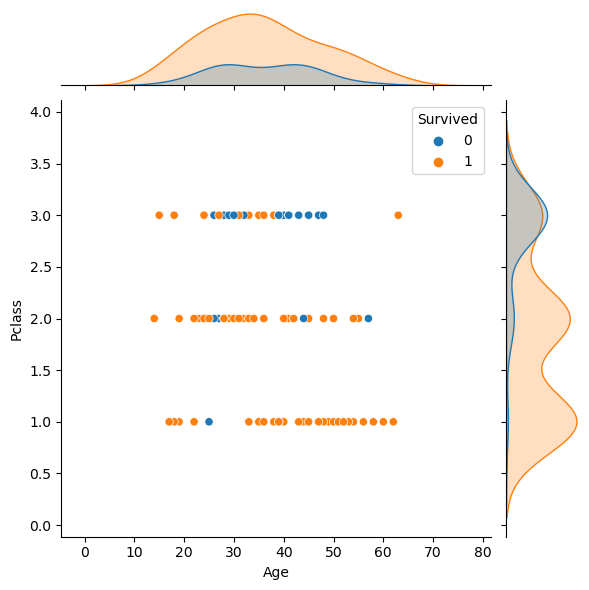

In [148]:
f = train.loc[(train['Title']=='Mrs')]
sns.jointplot(f, x='Age', y='Pclass', hue='Survived')

mr1_age = train.loc[(train['Title'] == 'Mrs') & (train['Pclass'] == 1), 'Age'].mean()
mr2_age = train.loc[(train['Title'] == 'Mrs') & (train['Pclass'] == 2), 'Age'].mean()
mr3_age = train.loc[(train['Title'] == 'Mrs') & (train['Pclass'] == 3), 'Age'].mean()

# Filling value
train['Age'] = train['Age'].mask((train['Title'] == 'Mrs') & (train['Pclass'] == 1) & train['Age'].isnull(), mr1_age)
train['Age'] = train['Age'].mask((train['Title'] == 'Mrs') & (train['Pclass'] == 2) & train['Age'].isnull(), mr2_age)
train['Age'] = train['Age'].mask((train['Title'] == 'Mrs') & (train['Pclass'] == 3) & train['Age'].isnull(), mr3_age)

### Mr Case

In [149]:
mr1_age = train.loc[(train['Title'] == 'Mr') & (train['Pclass'] == 1), 'Age'].mean()
mr2_age = train.loc[(train['Title'] == 'Mr') & (train['Pclass'] == 2), 'Age'].mean()
mr3_age = train.loc[(train['Title'] == 'Mr') & (train['Pclass'] == 3), 'Age'].mean()

# filling values
train['Age'] = train['Age'].mask((train['Title'] == 'Mr') & (train['Pclass'] == 1) & train['Age'].isnull(), mr1_age)
train['Age'] = train['Age'].mask((train['Title'] == 'Mr') & (train['Pclass'] == 2) & train['Age'].isnull(), mr2_age)
train['Age'] = train['Age'].mask((train['Title'] == 'Mr') & (train['Pclass'] == 3) & train['Age'].isnull(), mr3_age)

### Ms Case

In [150]:
Ms_age = train.loc[train['Title']=='Ms'].Age.mean()

# filling values
train['Age'] = train['Age'].mask((train['Title'] == 'Ms') & train['Age'].isnull(), Ms_age)

### Dr case

In [151]:
Dr_age = train.loc[(train['Title']=='Dr') & (train['Sex']=='male') & (train['Pclass']==1)].Age.mean()

# Filling value
train['Age'] = train['Age'].mask((train['Title'] == 'Dr') & train['Age'].isnull(), Dr_age)

### Master Case



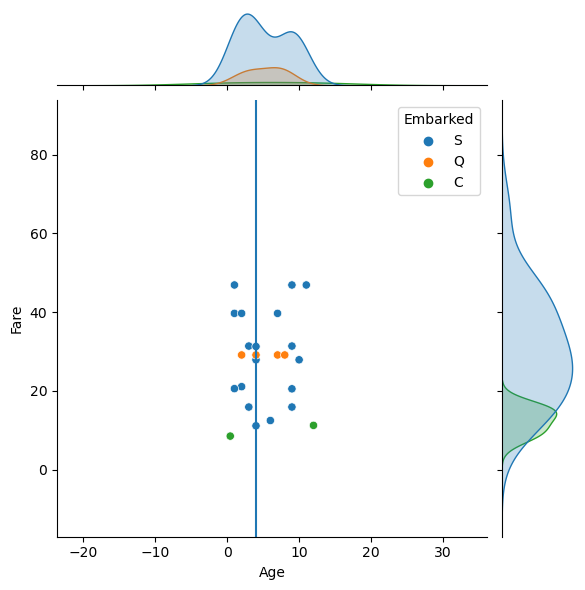

In [152]:
master_null_df = train.loc[(train['Age'].isnull()) & (train['Title']=='Master')]

master_age_df = train.loc[(train['Title']=='Master') & (train['Pclass']==3)]

sns.jointplot(master_age_df, x='Age', hue='Embarked', y='Fare')
plt.axvline(x=master_age_df['Age'].median());

# Filling value
train['Age'] = train['Age'].mask((train['Title'] == 'Master') & train['Age'].isnull(), master_age_df['Age'].median())

### Double Checking Null Values

In [153]:
print('Train trainset\n{}'.format(train.isnull().sum()))
print('\n   Test trainset\n{}'.format(test.isnull().sum()))

Train trainset
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Age_nan        0
Title          0
Last Name      0
Family Size    0
isAlone        0
Cabin Level    0
dtype: int64

   Test trainset
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


### Grouping Titles with less then 10 entries
    * Mrs is a title for mairred and windowed females.
    * Miss is a title for unmairred and under age, below the age of 18, females.
    * Master is a title for an underage male. If a person is under 18, master would be used. Once a person turns 18 and enters adulthood, Mister would be used.
    * Mister is a title for adult male over the age 18.

In [154]:
pd.crosstab(train.Title,train.Sex).T.style.background_gradient(cmap='summer_r')  # Checking the Initials with the Sex

Title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,th
Sex,,,,,,,,,,,,,,,,,
female,0,0,0,1,0,1,0,0,182,2,1,0,125,1,0,0,1
male,1,2,1,6,1,0,2,40,0,0,0,517,0,0,6,1,0


In [155]:
train['Fare qcut'] = pd.qcut(train['Fare'],5)
train['Age cut'] = pd.cut(train['Age'],5)

Misc_limit = 10 # if number of entries is less then 10, we are grouping them in 'Misc'
Title_list = train.Title.value_counts() < Misc_limit

train['Title'] = train['Title'].apply(lambda x: 'Misc' if x in Title_list.loc[Title_list==True] else x)

print(train['Title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
Survived    0    1
Title             
Master     17   23
Misc       15   12
Miss       55  127
Mr        436   81
Mrs        26   99


In [158]:
"""from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(train[['Age','Fare']])
train.info()"""

'from sklearn.impute import KNNImputer\nimputer = KNNImputer(n_neighbors=2, weights="uniform")\nimputer.fit_transform(train[[\'Age\',\'Fare\']])\ntrain.info()'

## Encoding

## Feature Selection

I am dropping no meanful columns 'PassengerId','Ticket', 'Cabin', 'Name' and kepping columns 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age_nan', 'Cabin_nan', 'Title', 'Last Name', 'Family Size', 'isAlone', 'Cabin Level'.

In [159]:
column_drop = ['PassengerId','Ticket', 'Cabin', 'Name']
train.drop(column_drop, axis=1, inplace=True)

# Analyst

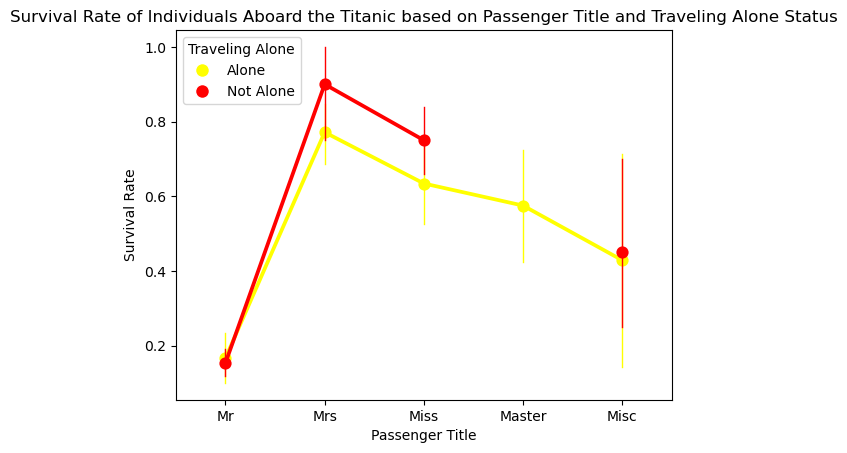

In [161]:
sns.pointplot(train, hue='isAlone', x='Title', y='Survived', palette=['Yellow', 'Red'], errwidth=1)
plt.xlabel('Passenger Title')
plt.ylabel('Survival Rate')
plt.title('Survival Rate of Individuals Aboard the Titanic based on Passenger Title and Traveling Alone Status')

# Create custom legend
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label='Alone', markerfacecolor='Yellow', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Not Alone', markerfacecolor='Red', markersize=10)
]
plt.legend(handles=legend_elements, title='Traveling Alone', loc='upper left')
plt.show()